In [50]:
from sklearn import datasets 
 
circles_data, circles_data_labels = datasets.make_circles(n_samples=100, factor=0.1, noise=0.1) 

In [51]:
circles_data_labels

array([0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1], dtype=int64)

In [52]:
from sklearn.model_selection import train_test_split

def split_dataset(data, labels, train_size):
    X_train, X_test, y_train, y_test = train_test_split(data, labels, train_size=train_size, random_state=42)
    return X_train, X_test, y_train, y_test

train_size = 0.7
X_train, X_test, y_train, y_test = split_dataset(circles_data, circles_data_labels, train_size)

print("Training set size:", len(X_train), len(y_train))
print("Test set size:", len(X_test), len(y_test))


Training set size: 70 70
Test set size: 30 30


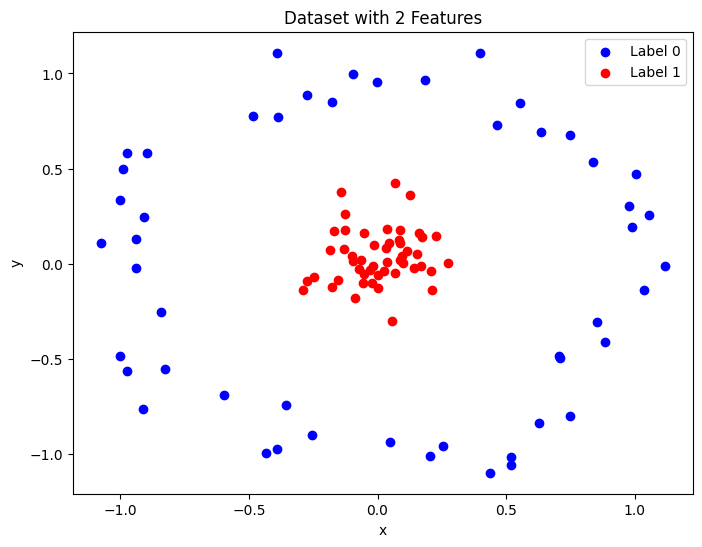

In [53]:
import matplotlib.pyplot as plt

def plot_data(features, labels):
    blue_points = features[labels == 0]
    red_points = features[labels == 1]
    
    plt.figure(figsize=(8, 6))
    plt.scatter(blue_points[:, 0], blue_points[:, 1], color='blue', label='Label 0')
    plt.scatter(red_points[:, 0], red_points[:, 1], color='red', label='Label 1')
    
    plt.title('Dataset with 2 Features')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.show()

plot_data(circles_data, circles_data_labels)


In [54]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(2, 64)  # 2 input features
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(64, 1)  # Binary classification, output 1 value
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.sigmoid(x)
        return x



In [55]:
X = torch.Tensor(circles_data)
y = torch.Tensor(circles_data_labels).view(-1, 1)  # Reshape for consistency with output

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)  # 70% training, 30% testing

train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)

print("Training set size:", len(train_dataset))
print("Test set size:", len(test_dataset))

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)


Training set size: 70
Test set size: 30


In [56]:
model = SimpleNN()
criterion = nn.BCELoss()  # Binary Cross-Entropy Loss for binary classification
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Adam optimizer

epochs = 100
for epoch in range(epochs):
    for inputs, labels in train_loader:
        optimizer.zero_grad()  # Zero the parameter gradients
        outputs = model(inputs)  # Forward pass
        loss = criterion(outputs, labels)  # Compute loss
        loss.backward()  # Backward pass
        optimizer.step()  # Optimize

    if epoch % 10 == 9:  # Print every 10 epochs
        print(f'Epoch {epoch+1}/{epochs}, Loss: {loss.item()}')


Epoch 10/100, Loss: 0.6385470032691956
Epoch 20/100, Loss: 0.5825534462928772
Epoch 30/100, Loss: 0.5003278851509094
Epoch 40/100, Loss: 0.3855898082256317
Epoch 50/100, Loss: 0.5788182616233826
Epoch 60/100, Loss: 0.3629465401172638
Epoch 70/100, Loss: 0.38186129927635193
Epoch 80/100, Loss: 0.2716006338596344
Epoch 90/100, Loss: 0.18300284445285797
Epoch 100/100, Loss: 0.2162868231534958


In [57]:
def evaluate_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0

    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            predicted = (outputs.data > 0.5).float()  # Convert probabilities to binary predictions
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = correct / total
    return accuracy

# Assuming you have a test_loader which is a DataLoader object for your test dataset
test_accuracy = evaluate_model(model, test_loader)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')


Test Accuracy: 100.00%


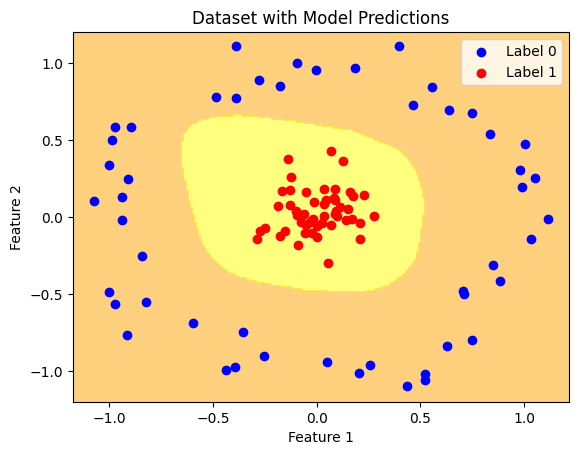

In [58]:
import numpy as np
import matplotlib.pyplot as plt

def plot_data_with_predictions(model, features, labels):
    """
    Plots a 2D dataset and the model's decision boundary.
    Points with label 0 are plotted in blue, points with label 1 are plotted in red.
    The background is colored orange for predicted 0 area, and yellow for predicted 1 area.

    Parameters:
    - model: The trained PyTorch model.
    - features: A 2D array-like structure of shape (n_samples, 2) representing the dataset features.
    - labels: An array-like structure of shape (n_samples,) representing the dataset labels.
    """
    # Generate a mesh grid to plot decision boundary
    x_min, x_max = features[:, 0].min() - 0.1, features[:, 0].max() + 0.1
    y_min, y_max = features[:, 1].min() - 0.1, features[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    # Predict over the mesh grid
    model.eval()
    with torch.no_grad():
        Z = model(torch.Tensor(np.c_[xx.ravel(), yy.ravel()]))
        Z = Z.reshape(xx.shape)
        Z = (Z > 0.5).float()  # Convert to binary predictions

    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, alpha=0.5, levels=[-1, 0.5, 2], colors=['orange', 'yellow'])
    plt.scatter(features[labels == 0, 0], features[labels == 0, 1], c='blue', label='Label 0')
    plt.scatter(features[labels == 1, 0], features[labels == 1, 1], c='red', label='Label 1')

    plt.title('Dataset with Model Predictions')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()

# Example usage:
# Ensure your model is trained before running this
plot_data_with_predictions(model, circles_data, circles_data_labels)
